In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from scipy.interpolate import make_interp_spline, BSpline
from numpy.polynomial import polynomial as P

In [2]:
df=pd.read_csv('SOD.csv')
print(df.shape)
df.head()

(8, 26)


,ROC,ADULT,ARRHYTHMIA,BANK,COMMUNITIES,COMPAS,CREDITCARD,DRUG,GERMAN,INTERNETADS,...,BANK .1,COMMUNITIES.1,COMPAS.1,CREDITCARD.1,DRUG.1,GERMAN.1,INTERNETADS.1,PENDIGITS.1,ST-MAT.1,WIKI4HE.1
0,NaN,0.5497,0.7195,0.6115,0.6564,0.7303,0.4114,0.6690,0.5681,0.5689,...,NaN,645.2657,62809130.10,NaN,617.7682,2483.6237,600.3933,3127.7921,118.8408,287.7036
1,NaN,0.5187,0.7133,0.6166,0.6743,0.7247,0.4151,0.7101,0.5783,0.5538,...,NaN,645.2683,62809129.20,NaN,617.7676,2477.8483,566.9293,3127.7897,118.8548,287.7037
2,NaN,0.4908,0.7107,0.6255,0.6889,0.7267,0.4225,0.6848,0.5573,0.5703,...,NaN,645.2706,62809127.86,NaN,617.7665,2474.8814,494.2843,3127.7799,118.8276,287.7035
3,NaN,0.4799,0.7206,0.6311,0.6910,0.7375,0.4284,0.7178,0.5762,0.5481,...,NaN,645.2651,62809126.72,NaN,617.7671,2475.9064,465.8133,3127.7730,118.8293,287.7054
4,NaN,0.4913,0.7389,0.6383,0.6854,0.7382,0.4350,0.6783,0.5564,0.5371,...,NaN,645.2736,62809125.97,NaN,617.7660,2480.0796,440.2070,3127.7690,118.8173,287.7039


In [3]:
#CONVERT

df1=df[['ADULT', 'ARRHYTHMIA', 'COMMUNITIES', 'COMPAS', 'DRUG', 'GERMAN', 'INTERNETADS', 'PENDIGITS', 'ST-MAT', 'WIKI4HE']].copy()
df2=df[['ADULT.1', 'ARRHYTHMIA.1', 'COMMUNITIES.1', 'COMPAS.1', 'DRUG.1', 'GERMAN.1', 'INTERNETADS', 'PENDIGITS', 'ST-MAT.1', 'WIKI4HE.1']].copy()

n_df2=(df2-df2.min())/(df2.max()-df2.min())
n_df2

df1_s = np.zeros([10,8])
df2_s = np.zeros([10,8])

df1_a = df1.to_numpy()
df2_a = n_df2.to_numpy()
for i in range(0,10):
    idx = np.argsort(df1_a[:,i])
    for j in range(0,8):
        df1_s[i][j] = df1_a[idx[j]][i]
        df2_s[i][j] = df2_a[idx[j]][i]
        
n_d=n_df2.to_numpy()

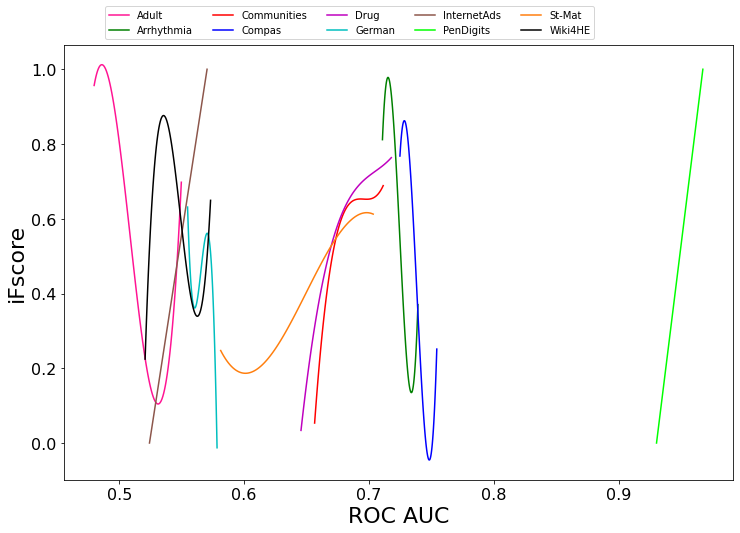

In [4]:
fig = plt.figure(figsize = (12, 8))

plt.xlabel("ROC AUC", fontsize='22')
plt.ylabel("iFscore", fontsize='22')

plt.xticks(fontsize='16')
plt.yticks(fontsize='16')

z0 = np.linspace(df1_s[0].min(), df1_s[0].max(), 100)
z1 = np.linspace(df1_s[1].min(), df1_s[1].max(), 100) 
z2 = np.linspace(df1_s[2].min(), df1_s[2].max(), 100) 
z3 = np.linspace(df1_s[3].min(), df1_s[3].max(), 100) 
z4 = np.linspace(df1_s[4].min(), df1_s[4].max(), 100) 
z5 = np.linspace(df1_s[5].min(), df1_s[5].max(), 100) 
z6 = np.linspace(df1_s[6].min(), df1_s[6].max(), 100) 
z7 = np.linspace(df1_s[7].min(), df1_s[7].max(), 100) 
z8 = np.linspace(df1_s[8].min(), df1_s[8].max(), 100) 
z9 = np.linspace(df1_s[9].min(), df1_s[9].max(), 100) 

x = np.polyfit(df1_s[0], df2_s[0], 3)
p0 = np.poly1d(x)
x = np.polyfit(df1_s[1], df2_s[1], 3)
p1 = np.poly1d(x)
x = np.polyfit(df1_s[2], df2_s[2], 3)
p2 = np.poly1d(x)
x = np.polyfit(df1_s[3], df2_s[3], 3)
p3 = np.poly1d(x)
x = np.polyfit(df1_s[4], df2_s[4], 3)
p4 = np.poly1d(x)
x = np.polyfit(df1_s[5], df2_s[5], 3)
p5 = np.poly1d(x)
x = np.polyfit(df1_s[6], df2_s[6], 3)
p6 = np.poly1d(x)
x = np.polyfit(df1_s[7], df2_s[7], 3)
p7 = np.poly1d(x)
x = np.polyfit(df1_s[8], df2_s[8], 3)
p8 = np.poly1d(x)
x = np.polyfit(df1_s[9], df2_s[9], 3)
p9 = np.poly1d(x)


plt.plot(z0, p0(z0), color = 'deeppink', linestyle = 'solid', markerfacecolor = 'white', markersize = 5, label='Adult')
plt.plot(z1, p1(z1), color = 'g', linestyle = 'solid', markerfacecolor = 'white', markersize = 5, label='Arrhythmia')
plt.plot(z2, p2(z2), color = 'r', linestyle = 'solid', markerfacecolor = 'white', markersize = 5, label='Communities')
plt.plot(z3, p3(z3), color = 'b', linestyle = 'solid', markerfacecolor = 'white', markersize = 5, label='Compas')
plt.plot(z4, p4(z4), color = 'm', linestyle = 'solid', markerfacecolor = 'white', markersize = 5, label='Drug')
plt.plot(z5, p5(z5), color = 'c', linestyle = 'solid', markerfacecolor = 'white', markersize = 5, label='German')
plt.plot(z6, p6(z6), color = 'tab:brown', linestyle = 'solid', markerfacecolor = 'white', markersize = 5, label='InternetAds')
plt.plot(z7, p7(z7), color = 'lime', linestyle = 'solid', markerfacecolor = 'white', markersize = 5, label='PenDigits')
plt.plot(z8, p8(z8), color = 'tab:orange', linestyle = 'solid', markerfacecolor = 'white', markersize = 5, label='St-Mat')
plt.plot(z9, p9(z9), color = 'k', linestyle = 'solid', markerfacecolor = 'white', markersize = 5, label='Wiki4HE')

'''
plt.plot(df1_s[0], df2_s[0], color = 'deeppink', linestyle = 'solid', marker = 'o', markerfacecolor = 'white', markersize = 5, label='Adult')
plt.plot(df1_s[1], df2_s[1], color = 'g', linestyle = 'solid', marker = 'o', markerfacecolor = 'white', markersize = 5, label='Arrhythmia')
plt.plot(df1_s[2], df2_s[2], color = 'r', linestyle = 'solid', marker = 'p', markerfacecolor = 'white', markersize = 5, label='Communities')
plt.plot(df1_s[3], df2_s[3], color = 'b', linestyle = 'solid', marker = 's', markerfacecolor = 'white', markersize = 5, label='Compas')
plt.plot(df1_s[4], df2_s[4], color = 'm', linestyle = 'solid', marker = 'd', markerfacecolor = 'white', markersize = 5, label='Drug')
plt.plot(df1_s[5], df2_s[5], color = 'c', linestyle = 'solid', marker = 'o', markerfacecolor = 'white', markersize = 5, label='German')
plt.plot(df1_s[6], df2_s[6], color = 'tab:brown', linestyle = 'solid', marker = 'p', markerfacecolor = 'white', markersize = 5, label='InternetAds')
plt.plot(df1_s[7], df2_s[7], color = 'lime', linestyle = 'solid', marker = 's', markerfacecolor = 'white', markersize = 5, label='PenDigits')
plt.plot(df1_s[8], df2_s[8], color = 'tab:orange', linestyle = 'solid', marker = 'p', markerfacecolor = 'white', markersize = 5, label='St-Mat')
plt.plot(df1_s[9], df2_s[9], color = 'k', linestyle = 'solid', marker = 's', markerfacecolor = 'white', markersize = 5, label='Wiki4HE')
'''

plt.legend( loc="upper right", bbox_to_anchor=(0.8, 1.1), ncol=5)
plt.show()

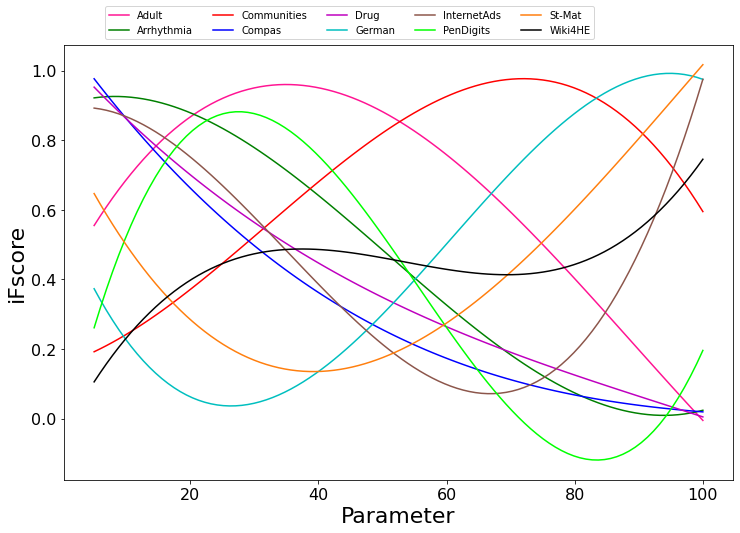

In [5]:
fig = plt.figure(figsize = (12, 8))
z=np.array([5, 10, 20, 30, 45, 60, 80, 100])

plt.xlabel("Parameter", fontsize='22')
plt.ylabel("iFscore", fontsize='22')

plt.xticks(fontsize='16')
plt.yticks(fontsize='16')

z_n = np.linspace(z.min(), z.max(), 100) 

x = np.polyfit(z, n_d[:,0], 3)
p0 = np.poly1d(x)
x = np.polyfit(z, n_d[:,1], 3)
p1 = np.poly1d(x)
x = np.polyfit(z, n_d[:,2], 3)
p2 = np.poly1d(x)
x = np.polyfit(z, n_d[:,3], 3)
p3 = np.poly1d(x)
x = np.polyfit(z, n_d[:,4], 3)
p4 = np.poly1d(x)
x = np.polyfit(z, n_d[:,5], 3)
p5 = np.poly1d(x)
x = np.polyfit(z, n_d[:,6], 3)
p6 = np.poly1d(x)
x = np.polyfit(z, n_d[:,7], 3)
p7 = np.poly1d(x)
x = np.polyfit(z, n_d[:,8], 3)
p8 = np.poly1d(x)
x = np.polyfit(z, n_d[:,9], 3)
p9 = np.poly1d(x)


plt.plot(z_n, p0(z_n), color = 'deeppink', linestyle = 'solid', markerfacecolor = 'white', markersize = 5, label='Adult')
plt.plot(z_n, p1(z_n), color = 'g', linestyle = 'solid', markerfacecolor = 'white', markersize = 5, label='Arrhythmia')
plt.plot(z_n, p2(z_n), color = 'r', linestyle = 'solid', markerfacecolor = 'white', markersize = 5, label='Communities')
plt.plot(z_n, p3(z_n), color = 'b', linestyle = 'solid', markerfacecolor = 'white', markersize = 5, label='Compas')
plt.plot(z_n, p4(z_n), color = 'm', linestyle = 'solid', markerfacecolor = 'white', markersize = 5, label='Drug')
plt.plot(z_n, p5(z_n), color = 'c', linestyle = 'solid', markerfacecolor = 'white', markersize = 5, label='German')
plt.plot(z_n, p6(z_n), color = 'tab:brown', linestyle = 'solid', markerfacecolor = 'white', markersize = 5, label='InternetAds')
plt.plot(z_n, p7(z_n), color = 'lime', linestyle = 'solid', markerfacecolor = 'white', markersize = 5, label='PenDigits')
plt.plot(z_n, p8(z_n), color = 'tab:orange', linestyle = 'solid', markerfacecolor = 'white', markersize = 5, label='St-Mat')
plt.plot(z_n, p9(z_n), color = 'k', linestyle = 'solid', markerfacecolor = 'white', markersize = 5, label='Wiki4HE')

'''
spl = make_interp_spline(z, n_d[:,0], k=2)
power_smooth0 = spl(z_n)
spl = make_interp_spline(z, n_d[:,1], k=2)
power_smooth1 = spl(z_n)
spl = make_interp_spline(z, n_d[:,2], k=2)
power_smooth2 = spl(z_n)
spl = make_interp_spline(z, n_d[:,3], k=3)
power_smooth3 = spl(z_n)
spl = make_interp_spline(z, n_d[:,4], k=3)
power_smooth4 = spl(z_n)
spl = make_interp_spline(z, n_d[:,5], k=3)
power_smooth5 = spl(z_n)
spl = make_interp_spline(z, n_d[:,6], k=3)
power_smooth6 = spl(z_n)
spl = make_interp_spline(z, n_d[:,7], k=3)
power_smooth7 = spl(z_n)
spl = make_interp_spline(z, n_d[:,8], k=3)
power_smooth8 = spl(z_n)
spl = make_interp_spline(z, n_d[:,9], k=3)
power_smooth9 = spl(z_n)


plt.plot(z_n, power_smooth0, color = 'deeppink', linestyle = 'solid', markerfacecolor = 'white', markersize = 5, label='Adult')
plt.plot(z_n, power_smooth1, color = 'g', linestyle = 'solid', markerfacecolor = 'white', markersize = 5, label='Arrhythmia')
plt.plot(z_n, power_smooth2, color = 'r', linestyle = 'solid', markerfacecolor = 'white', markersize = 5, label='Communities')
plt.plot(z_n, power_smooth3, color = 'b', linestyle = 'solid', markerfacecolor = 'white', markersize = 5, label='Compas')
plt.plot(z_n, power_smooth4, color = 'm', linestyle = 'solid', markerfacecolor = 'white', markersize = 5, label='Drug')
plt.plot(z_n, power_smooth5, color = 'c', linestyle = 'solid', markerfacecolor = 'white', markersize = 5, label='German')
plt.plot(z_n, power_smooth6, color = 'tab:brown', linestyle = 'solid', markerfacecolor = 'white', markersize = 5, label='InternetAds')
plt.plot(z_n, power_smooth7, color = 'lime', linestyle = 'solid', markerfacecolor = 'white', markersize = 5, label='PenDigits')
plt.plot(z_n, power_smooth8, color = 'tab:orange', linestyle = 'solid', markerfacecolor = 'white', markersize = 5, label='St-Mat')
plt.plot(z_n, power_smooth9, color = 'k', linestyle = 'solid', markerfacecolor = 'white', markersize = 5, label='Wiki4HE')
'''

plt.legend( loc="upper right", bbox_to_anchor=(0.8, 1.1), ncol=5)
plt.show()

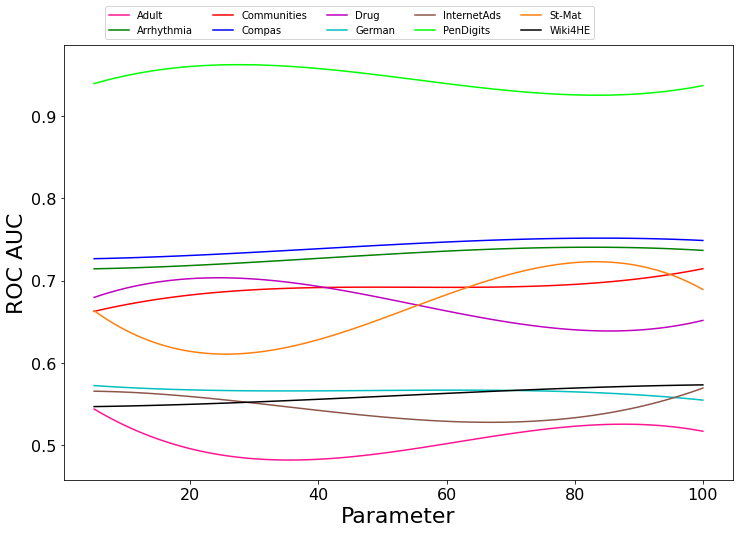

In [6]:
fig = plt.figure(figsize = (12, 8))
z=[5, 10, 20, 30, 45, 60, 80, 100]

plt.xlabel("Parameter", fontsize='22')
plt.ylabel("ROC AUC", fontsize='22')

plt.xticks(fontsize='16')
plt.yticks(fontsize='16')

x = np.polyfit(z, df1_a[:,0], 3)
p0 = np.poly1d(x)
x = np.polyfit(z, df1_a[:,1], 3)
p1 = np.poly1d(x)
x = np.polyfit(z, df1_a[:,2], 3)
p2 = np.poly1d(x)
x = np.polyfit(z, df1_a[:,3], 3)
p3 = np.poly1d(x)
x = np.polyfit(z, df1_a[:,4], 3)
p4 = np.poly1d(x)
x = np.polyfit(z, df1_a[:,5], 3)
p5 = np.poly1d(x)
x = np.polyfit(z, df1_a[:,6], 3)
p6 = np.poly1d(x)
x = np.polyfit(z, df1_a[:,7], 3)
p7 = np.poly1d(x)
x = np.polyfit(z, df1_a[:,8], 3)
p8 = np.poly1d(x)
x = np.polyfit(z, df1_a[:,9], 3)
p9 = np.poly1d(x)


plt.plot(z_n, p0(z_n), color = 'deeppink', linestyle = 'solid', markerfacecolor = 'white', markersize = 5, label='Adult')
plt.plot(z_n, p1(z_n), color = 'g', linestyle = 'solid', markerfacecolor = 'white', markersize = 5, label='Arrhythmia')
plt.plot(z_n, p2(z_n), color = 'r', linestyle = 'solid', markerfacecolor = 'white', markersize = 5, label='Communities')
plt.plot(z_n, p3(z_n), color = 'b', linestyle = 'solid', markerfacecolor = 'white', markersize = 5, label='Compas')
plt.plot(z_n, p4(z_n), color = 'm', linestyle = 'solid', markerfacecolor = 'white', markersize = 5, label='Drug')
plt.plot(z_n, p5(z_n), color = 'c', linestyle = 'solid', markerfacecolor = 'white', markersize = 5, label='German')
plt.plot(z_n, p6(z_n), color = 'tab:brown', linestyle = 'solid', markerfacecolor = 'white', markersize = 5, label='InternetAds')
plt.plot(z_n, p7(z_n), color = 'lime', linestyle = 'solid', markerfacecolor = 'white', markersize = 5, label='PenDigits')
plt.plot(z_n, p8(z_n), color = 'tab:orange', linestyle = 'solid', markerfacecolor = 'white', markersize = 5, label='St-Mat')
plt.plot(z_n, p9(z_n), color = 'k', linestyle = 'solid', markerfacecolor = 'white', markersize = 5, label='Wiki4HE')

plt.legend( loc="upper right", bbox_to_anchor=(0.8, 1.1), ncol=5)
plt.show()